In [1]:
import os
import glob
import numpy as np
from diskKLIP import diskDuster
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
# path here
root = os.getcwd()
hadata = root+'\\datum2'
offdata = root+'\\datum1'

In [3]:
ann = 6 
mov = 3
KLs = [50]

In [4]:
# ha
ha = diskDuster(hadata, 'test1', 'output', klipparams=[ann, mov, KLs])
ha.run_KLIP()
ha.get_result()

reading data, num files:  1743
Begin align and scale images for each wavelength
Wavelength 0.656 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 6
Closing threadpool
Derotating Images...
Writing Images to directory C:\Users\willi\Amherst\Thesis\Code\diskShapers\diskImaging\output
wavelength collapsing reduced data of shape (b, N, wv, y, x):(1, 1743, 1, 451, 451)
KLIP result is saved to: output\test1-KLmodes-all.fits
result dir is output\test1-KLmodes-all.fits


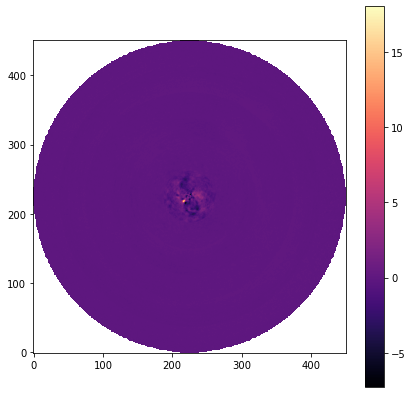

In [5]:
ha.show_result(0)

In [6]:
# ha off
off = diskDuster(offdata, 'test2', 'output', klipparams=[ann, mov, KLs])
off.run_KLIP()
off.get_result()

reading data, num files:  152
Begin align and scale images for each wavelength
Wavelength 0.642 with index 0 has finished align and scale. Queuing for KLIP
Total number of tasks for KLIP processing is 1
Closing threadpool
Derotating Images...
Writing Images to directory C:\Users\willi\Amherst\Thesis\Code\diskShapers\diskImaging\output
wavelength collapsing reduced data of shape (b, N, wv, y, x):(1, 152, 1, 451, 451)
KLIP result is saved to: output\test2-KLmodes-all.fits
result dir is output\test2-KLmodes-all.fits


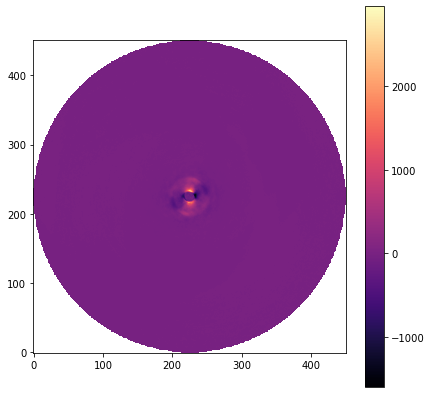

In [7]:
off.show_result(0)

In [8]:
haimg = ha.resultdatacube[0]
offimg = off.resultdatacube[0]

In [9]:
def create_circular_mask(h, w, center=None, radius=None, leq=False):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    if leq is False:
        return dist_from_center >= radius
    else:
        return dist_from_center <= radius

In [10]:
def domask(img, inn=70, outt=180):
    outermask = create_circular_mask(451, 451, radius=outt, leq=True)
    img[~outermask] = np.nan
    mask = create_circular_mask(451, 451, radius=inn)
    masked_img = img.copy()
    masked_img[~mask] = np.nan
    return masked_img

In [11]:
n = 50
hamask = domask(haimg, inn=n)
offmask = domask(offimg, inn=n)

In [12]:
summ = hamask + offmask

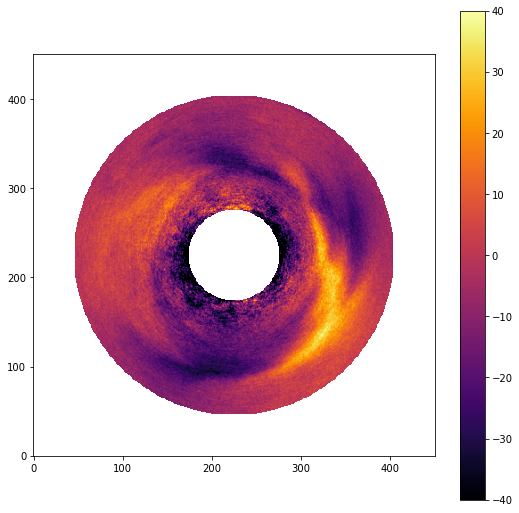

In [16]:
n = 40
plt.figure(figsize=(9,9))
plt.imshow(summ, origin='lower', vmin=-n, vmax=n, cmap='inferno')
plt.colorbar()
plt.savefig('disk_m'+str(mov)+'.png', dpi=200)